
# Práctica 3: Metaheurísticas basadas en poblaciones - Algoritmos Genéticos

<center><h3>
    Nerea Freiría Alonso
</h3></center>


## Instrucciones

Esto es **Jupyter Notebook**, un documento que integra código Python en un archivo Markdown.
Esto nos permite ir ejecutando celdas de código poco a poco, así como generar automáticamente un informe bien formateado de la práctica.

Puedes añadir una celda con el botón **"Insert"** de la barra de herramentas, y cambiar su tipo con **"Cell > Cell Type"**

Para ejecutar una celda de código, la seleccionaremos y pulsaremos el botón **"▶ Run"** de la barra de herramentas.
Para pasar el documento a HTML, seleccionaremos **"File > Download as > HTML (.html)"**

Sigue este guión hasta el final. Ejecuta el código proporcionado paso a paso comprendiendo lo que estás haciendo y reflexionando sobre los resultados. Habrá preguntas intercaladas a lo largo del guión, responde a todas ellas en la sección reservada para ese fin: **"Respuestas a los cuestionarios"**. Por favor, no modifiques ninguna linea de código excepto cuando se te pida explícitamente.

No olvides insertar tu **nombre y apellidos** en la celda superior.

IMPORTANTE: Escribe el código de tu o tus soluciones/respuestas en las celdas que se indican para ello. Además, a lo largo de la práctica se plantearán varias preguntas que debéis responder en la parte inferior del documento, incluyendo las celdas que veáis necesarias (si hacéis referencia a partes concretas de vuestro código, etc) para reponder a ellas.

## Entrega de la práctica

La fecha límite de entrega será la indicada en el Campus Virtual. La entrega consistirá de un único archivo comprimido con nombre `APELIDOS_NOME_Geneticos.zip` que contenga los seguientes ficheros:

 * `APELIDOS_NOME_Geneticos.html`: Archivo HTML fruto de la exportación del presente Notebook, con las preguntas respondidas al final del documento.
 * `APELIDOS_NOME_Geneticos.ipynb`: Archivo fuente Jupyter Notebook.
 * Archivo de datos de los problema utilizados en la resolución.


## Preliminares adicionales sobre Python


Para esta práctica, te sugerimos algunas funciones de paquetes que pueden resultarte útiles en la realización de esta práctica.

Has visto que cuando realizas laboratorios y pruebas para ajustar parámetros resulta necesario tener una estimación del tiempo invertido en la ejecución. Eso ayuda a valorar el balance del tiempo computacional frente a la inclusión de valores de parámetros en el laboratorio. En ese sentido, puede resultar conveniente añadir barras de progreso que además te permitan visualizar el progreso de resolución de las iteraciones. Para ese propósito podéis hacer uso del paquete `tqdm` (https://tqdm.github.io/). 

Puedes ver ejemplos en detalle descritos en https://towardsdatascience.com/progress-bars-for-python-with-tqdm-4dba0d4cb4c

Veámos un ejemplo ilustrativo aquí.

In [133]:
# solo debes importarlo una vez en el notebook.
# fíjate que estamos importando del paquete tqdm.notebook para que incorpore los decoradores compatibles en Jupyter 
# (en Python podrías importar simplemente desde el paquete tdqm)
from tqdm.notebook import trange, tqdm

`tqdm` permite añadir una barra de progreso que informe sobre el tiempo y el paso de iteraciones. En el ejemplo, la variable `nit` son el número de iteraciones a realizar y para conseguir que se visualize el progreso se pasa a `tqdm` un iterador de rango.

In [134]:
from random import randint

heads = 0
tails = 0
nit=1000000
for i in tqdm(range(nit), desc='Coin Flip Progress'):
    toss = randint(0, 1)
    if toss == 0:
        heads += 1
    else:
        tails += 1

Coin Flip Progress:   0%|          | 0/1000000 [00:00<?, ?it/s]

El paquete nos ofrece la posibilidad combinar `tdqm(range(NUM_IT))` en una única función, llamada `trange(NUM_IT)`. Veamos su funcionamiento en el siguiente ejemplo, que muestra también cómo podemos hacer cuando necesitamos llevar cuenta del progreso en bucles anidados.

In [135]:
num_games = 3

for game in trange(num_games, desc='Overall Progress'):
    heads = 0
    tails = 0
    nit=1000000
    for j in trange((nit), desc=f'Game {game+1} Progress'):
        toss = randint(0, 1)
        if toss == 0:
            heads += 1
        else:
            tails += 1
            
    print(f'Heads: {heads}, Tails: {tails}')


Overall Progress:   0%|          | 0/3 [00:00<?, ?it/s]

Game 1 Progress:   0%|          | 0/1000000 [00:00<?, ?it/s]

Heads: 499979, Tails: 500021


Game 2 Progress:   0%|          | 0/1000000 [00:00<?, ?it/s]

Heads: 499651, Tails: 500349


Game 3 Progress:   0%|          | 0/1000000 [00:00<?, ?it/s]

Heads: 500213, Tails: 499787


Aprovechamos para recordarte que puedes utilizar semillas en la generación de secuencias de números aleatorios para hacer determinista y más verificable tu implementación. 

In [136]:
import random
import time

In [137]:
# este vector será aleatorio si no habíamos establecido una semilla previamente.
# Podríamos tener incluso una semilla basada en el tiempo actual para forzar que se aleatorice 
# si ejecutamos esta celda múltiples veces
random.seed(time.time())

vector_aleatorio = [ random.randint(1, 10) for i in range(1,10) ]
print ("vector aleatorio ", vector_aleatorio)

# aquí establecemos una semilla totalmente fija
# que no depende del tiempo y por tanto está bajo nuestro control
semilla = 123456
random.seed (semilla)

# este viene determinado por la semilla
vector_aleatorio = [ random.randint(1, 10) for i in range(1,10) ]
print ("vector aleatorio ", vector_aleatorio)

# y ahora somos capaces de generar la misma serie "aleatoria"
random.seed (semilla)
vector_aleatorio = [ random.randint(1, 10) for i in range(1,10) ]
print ("vector aleatorio igual que el anterior", vector_aleatorio)


vector aleatorio  [2, 5, 9, 2, 2, 2, 2, 10, 10]
vector aleatorio  [5, 1, 3, 1, 2, 1, 5, 1, 2]
vector aleatorio igual que el anterior [5, 1, 3, 1, 2, 1, 5, 1, 2]


Esto puede ser útil para verificar que siempre obtienes los mismos resultados ante el mismo conjunto de entradas.

## El Problema del Viajante de Comercio (VC) con Algoritmos Genéticos

El objetivo de esta práctica es modelar e implementar un agente inteligente que sea capaz de resolver el problema del VC mediante la metaheurística (MH) de poblaciones conocida como Algoritmo Genético (GA, del inglés *Genetic  Algorithm*). Para ello, realizarás una implementación del algoritmo básico visto en la clase expositiva y valorarás si la introducción de modificaciones en el diseño del algoritmo te permite mejorar la calidad de las soluciones alcanzadas.


### Definición del problema de Viajante de Comercio (VC)


La definición del problema sigue la descripción ya vista en las prácticas anterior, en la que se disponía de una represetación del problema mediante un grafo ponderado. Así que, en primer lugar importa el módulo Python que acompaña esta práctica, que ya trae las funciones de apoyo como la clase `Localizaciones` que implementaba la carga de datos y que utilizaba una matriz de adyacencia.

In [138]:
from helpers_mod_ga import *

Si todo va bien, la primera distancia entre la ciudad 0 y 1 debe ser unos 55 km para el problema de las 8 ciudades gallegas.

In [139]:
g1=Localizaciones(filename='./data/grafo8cidades.txt')
print (g1.distancia(0,1))

g2=Localizaciones(filename='./data/US120.txt')

55.88273580792048



## P3.1: Implementación básica de Algoritmo Genético



Implementa un algoritmo genético básico para resolver el problema del VC, siguiendo la descripción algorítmica de la MH vista en la clase expositiva.

Ten en cuenta las siguientes consideraciones de diseño para completar esta implementación básica:
- Representación  de  las  soluciones:  representación  de  orden  (permutaciones) comenzando y finalizando en la ciudad 0. 

- Población inicial: inicialización completamente aleatoria de la población inicial, que sean permutaciones válidas.

- Operador de cruce: Order Crossover (OX). La función/método que se encargue de hacer el cruce ordenado debe aceptar como parámetros la probabilidad de cruce (por defecto, establecida a pc=0.95), los dos puntos de corte así como los cromosomas sobre los que actuar.

- Operador de mutación: se utilizará el operador de intercambio, aplicado con una probabilidad de mutación. Vuestra implementación debe manejar dos variantes de esta función:
    - Mutación individual: solo se aplica la mutación, si procede, sobre un único gen en el cromosoma. La probabilidad de mutación por defecto se establece pm=0.25. Esta función debería aceptar el índice del gen sobre el que actuar además de la probabilidad de mutación y el cromosoma original.
    - Mutación cromosómica: se aplica la mutación contemplando todo el cromosoma, de forma que individualmente puede mutar cada gen de manera independiente según una probabilidad de mutación, establecida por defecto a pm=0.01.

- El reemplazo de la generación debe seguir un modelo de reemplazo generacional con elitismo. En particular, tu implementación debe disponer de dos variantes de la función de reemplazo:
    - mitades: haz que la mitad de la población resultante del reemplazo provenga de la generación actual mientras que la otra mitad provenga de los descendientes, tomando en ambos casos los mejores individuos. 
    - elitismo "elite=2": de esta forma, hay que mantener los 2 mejores individuos de la generación actual/ancestros; mientras que el resto provienen de entre los mejores hijos. La función de reemplazo debería parametrizar "elite".
    
Ambas variantes deben recibir como parámetro la lista de cromosomas de las poblaciones ascentros e hijos generados y retornar la población resultante.
    

- Condición de parada simple basado en un número de iteraciones máximo pasado como parámetro.

- La implementación debe ser completamente parametrizable, de forma que todos los componentes susceptibles de ser ajustados mediante parámetros deberían puedan ser establecidos en cada ejecución/problema.


Lanza varias ejecuciones para verificar que puede resolver el problema con los siguientes grafos de
ejemplo:
- grafo 8 ciudades gallegas (`data/grafo8cidades.txt`), con una población de 2 individuos y 150 iteraciones.
- grafo 120 ciudades estadounidenses (`data/US120.txt`), con una población de 32 individuos y 500 iteraciones.


Si no te convergiera, prueba a extender el número de iteraciones o variar parámetros como la probabilidad de mutación.



❓ **Pregunta 1**. Explica brevemente los detalles relevantes de tu código para entender tu implementación (p.ej., estructura de tu código, funciones, implementación de operadores, etc.). ¿Cuál es el mecanismo de selección escogido para tu implementación? Explica también cómo has verificado tu implementación.

## P3.2: Laboratorio

Como toda metaheurística, resulta crucial conocer cómo afecta en términos prácticos los parámetros
del algoritmo y los operadores desarrollados. Estudia el comportamiento del algoritmo implementado para resolver VC atendiendo a las siguientes cuestiones.


❓ **Pregunta 2**. Realiza el estudio de la calidad de la solución variando el tamaño de la población: 1, 2, 4, 8, 16, 32, 64... ¿Qué valor recomendarías para el problema de las 120 ciudades? ¿Por qué? Ten en cuenta que tienes dos variantes del mecanismo de reemplazo.

❓ **Pregunta 3**. Ahora realiza un estudio similar variando la probabilidad de mutación en el rango 0, ..., 0.95 en pasos de 0.05~0.10. ¿Qué valor recomendarías para este parámetro? ¿Por qué? Ten en cuenta que tienes dos variantes del mecanismo de mutación.

❓ **Pregunta 4**. Finalmente realiza un estudio variando el número de iteraciones máximas en el rango de 50 a 1000, considerando un paso variable o adaptativo a conveniencia. ¿Qué valor recomendarías para este parámetro? ¿Por qué? Realiza una discusión reflexionando sobre los resultados conjuntos de estos tres parámetros. 

Apoya todas tus respuestas en datos-gráficos resultantes de tus estudios.

Importante: además de la calidad de la soluciones obtenidas, se recomienda medir tiempos para tomar medidas operativas sobre el número de repeticiones que permitan realizar promedios (se recomienda no más de 10 si se ralentiza mucho) y prescindir de manera razonada de valores en las series de ejecución que no sean computacionalmente rentables/viables con tu implementación/ordenador (p.ej., tamaños de población elevados pueden tomar mucho tiempo para resolver).







# Respuestas al cuestionario

## P3.1: Implementación básica

### Pregunta 1

#### CÓDIGO

In [140]:
#función de coste, parámetros: solución y el conjunto de ciudades
def coste(solucion, g):
    coste=0
    solucion_aux=[0]+solucion+[0]
    for i in range(len(solucion_aux)-1):
        coste+=g.distancia(solucion_aux[i],solucion_aux[i+1])
    return coste

In [141]:
def genera_solucion_inicial(g):
    solucion=[x for x in range(1,g.nciudades)]
    random.shuffle(solucion)
    return solucion

In [142]:
#funcion que devuelve una poblacion de tamaño npoblacion ordenado según su coste
def generar_poblacion_inicial(g,npoblacion, genera_solucion_inicial):
    par_poblacion=[]
    for i in range(npoblacion):
        auxiliar=genera_solucion_inicial(g)
        par_poblacion.append((auxiliar, coste(auxiliar, g)))
    #devolvemos la poblacion ordenada según su coste
    return sorted(par_poblacion, key=lambda x: x[1])

In [143]:
def auxiliar_Cruce(indice0, indice1, cromosoma1, cromosoma2):
    numeros=[cromosoma1[x] for x in range(indice0, indice1+1)]
    primer_cruce=numeros.copy()
    i=indice1+1 # indice para saber posición de recorrido en cromosoma2
    j=indice1+1 # indice posición actual de cromosoma primer_cruce
    if(j==len(cromosoma1)):
        j=0
        i=0
    while(len(primer_cruce)!= len(cromosoma1)):
        if cromosoma2[i] not in  numeros:
            primer_cruce.insert(j,cromosoma2[i])
            j+=1
            if(j==len(cromosoma1)):
                j=0
            
        if(i==len(cromosoma1)-1):
            i=0
        else:
            i+=1
    return primer_cruce

In [144]:
def cruce_Order_Crossover(indice0, indice1, cromosoma1, cromosoma2,probabilidad=0.95):
    if(random.uniform(0,1)<probabilidad):
        return cromosoma1,cromosoma2
    indice0=random.randint(0, len(cromosoma1)-1)
    indice1=indice0
    while(indice0==indice1):
        indice1=random.randint(0, len(cromosoma1)-1)
   
    if(indice0 >indice1):
        indice0, indice1= indice1, indice0
        
    return auxiliar_Cruce(indice0, indice1, cromosoma1, cromosoma2), auxiliar_Cruce(indice0, indice1,  cromosoma2,cromosoma1)

In [145]:
def mutacion_individual(cromosoma, indice0, pm=0.25):
    if(random.uniform(0,1)>pm):
        return cromosoma
    indice0=random.randint(0, len(cromosoma)-1)
    aleatorio=indice0
    while aleatorio==indice0:
        aleatorio=random.randint(0, len(cromosoma)-1)
    nuevo=cromosoma.copy()
    nuevo[aleatorio], nuevo[indice0]=nuevo[indice0], nuevo[aleatorio]
    return nuevo
    
def mutacion_cromosomica(cromosoma, indice0, pm=0.01):
    nuevo=cromosoma.copy()
    for i in range(len(cromosoma)):
        nuevo= mutacion_individual(nuevo, i, pm)   
    return nuevo

In [146]:
def auxiliar_par_soluciones(poblacion,g):

    return sorted(poblacion, key=lambda x: x[1])

In [147]:
def reemplazo_mitad(ancestros, hijos,g,elite=-1):
    par_ancestros=auxiliar_par_soluciones(ancestros, g)
    par_hijos=auxiliar_par_soluciones(hijos, g)
    mitad= len(ancestros)/2
    poblacion_resultante=par_ancestros[0:int(mitad)]
    poblacion_resultante+=par_hijos[0:int(mitad)]
    return sorted(poblacion_resultante, key=lambda x: x[1])
    
    
    
def reemplazo_elitismo(ancestros, hijos,g, elite=2):
    par_ancestros=auxiliar_par_soluciones(ancestros, g)
    par_hijos=auxiliar_par_soluciones(hijos, g)
    poblacion_resultante=ancestros[0:elite]
    poblacion_resultante+=hijos[0:len(ancestros)-elite]
    return sorted(poblacion_resultante, key=lambda x: x[1])


In [148]:
def aux_seleccion_padres(padres):
    seleccion=random.uniform(0,1)
    aux=0
    padre1=padres[0]
    for i in padres:
        probabilidad=(1/2**(aux+1))
        if(seleccion> probabilidad):
            padre1=padres[aux]
            break
        aux+=1
    padres.remove(padre1)
    return padre1[0]

In [149]:
def seleccion_padres(padres):
    return aux_seleccion_padres(padres), aux_seleccion_padres(padres) 

In [150]:
def algoritmo_genetico_vc(g,tpoblacion, iteraciones, mutacion=mutacion_individual,reemplazo=reemplazo_mitad, probabilidad_mutacion=0.25):
    poblacion=generar_poblacion_inicial(g,tpoblacion, genera_solucion_inicial)
    mejores=[]
    indice0=0
    indice1=0
    a=0
    for i in range(iteraciones ):
        padres = poblacion.copy()
        a+=1
        generacion_intermedia=[]
        
        while(len(padres)!=0):
            p1, p2 = seleccion_padres(padres)
           
            aux = cruce_Order_Crossover(indice0, indice1, p1, p2)
            
            
            #mutamos os cromosomas resultantes
            aux1=(mutacion(aux[0], -1,probabilidad_mutacion))
            aux2=(mutacion(aux[1],-1,probabilidad_mutacion))
            #anadimolos a funcion intermedia
            generacion_intermedia.append((aux1, coste(aux1,g)))
            generacion_intermedia.append((aux2, coste(aux2,g)))
        #remplazamos a poblacion actual pola intermedia
        poblacion=reemplazo(poblacion,generacion_intermedia, g)
        
    return (sorted(poblacion, key=lambda x: x[1]))[0]

In [161]:
algoritmo_genetico_vc(g2,32,500)[1]

78092.77495597916

In [167]:
algoritmo_genetico_vc(g1,2,150)


([3, 4, 5, 6, 7, 2, 1], 503.9384936166176)

#### DETALLES DE IMPLEMENTACIÓN

A solución codifícase nun array de xeito que os índices indique a posición na que van  a ser recorridos e o interior a cidade que é. A solución devolta non inclúe a cidade inicial nin o remate da mesma.
O código estructurouse en 6 funcións principais:
* **generar_poblacion_inicial**: dado un conxunto de cidades g, un tamaño de población(tpoblacion) xera unha población de tpoblacion solucións empregando a función que se lle pasa como terceiro parámetro. As solucións individuais xéranse de forma aleatoria. Devolve unha lista ordenada por custe



* **seleccion_padres**: elixe os pais que se van a cruzar de xeito que se lle dá máis probabilidade de cruze aos de menor custe. Ordenanse as solucións en función do seu custe asignandolle unha probabilidade de 1/(2^posición-1). Deste xeito o primeiro terá unha probabilidade de 0.5, o segundo de 0.25, o terceiro de 0.125... A función acepta como parámetro o conxunto de pais que se poden seleccionar.




* **cruce_Order_Crossover**: realiza o cruce dos dous pais e devolve os dous fillos posibles. Débeselle pasar os índices de cruce e os dous cromosomas pais a cruzar.




* **mutacion**: función de mutación que realiza un intercambio de posicións dados os dous índices de cambio. Esta mutación solo se realizará cunha probabilidad que se parametrizará coa variable de perobabilidad_mutacion. Para esta función implementaronse dúas estratexias. Por un lado, unha mutación cromosómica e por outra unha individual.




* función de **reemplazo**: realizarase a nova xeración a partir dos pais e da xeración intermedia. Seguironse dúas implementacións. Por un lado, un remplazo elitista, nos que se manterían un número determinados dos mellores pais e o resto completaríase cos mellores fillos. Por outra banda, o reemplazo por mitads, hnas que se collería a metade dos mellores pais e a metade dos mellores fillos. Devolve unha lista ordenada por custe




* Función do **algoritmo xenético base**: algoritmo xenetico base que realiza chamadas as funcións descritas con anterioridade. Acepta os parámetros que será necesario variar para o laboratorio posterior




Para comprobar o correcto funcionamento obtouse por probar de xeito separado as funcions, por exemplo, no caso da función de cruce fixaronse dous cromosomas crearonse probas introducindo unha probabilidade=1 e varios índices. Deste xeito sabemos que funciona de forma correcta. Probas similares a esta foron realizadas para o resto de funcións.

## P3.2: Laboratorio

### Pregunta 2 (1.5 puntos)



In [168]:

tam_poblacion= [2, 4, 8, 16, 32, 64, 128, 256]
respuesta=[]
res=0.0
for t in trange(len(tam_poblacion),desc='Progreso de tamanhos'):
    for j in trange(10, desc='iteracion'):
        res+=(algoritmo_genetico_vc(g2,tam_poblacion[t],500))[1]
    respuesta.append((tam_poblacion[t],res/10))
    res=0
print(respuesta)

respuesta_2=[]
res=0.0
for t in trange(len(tam_poblacion),desc='Progreso de tamanhos'):
    for j in trange(10, desc='iteracion'):
        res+=(algoritmo_genetico_vc(g2,tam_poblacion[t],500,reemplazo=reemplazo_elitismo))[1]
    respuesta_2.append((tam_poblacion[t],res/10))
    res=0
print(respuesta_2)




Progreso de tamanhos:   0%|          | 0/8 [00:00<?, ?it/s]

iteracion:   0%|          | 0/10 [00:00<?, ?it/s]

iteracion:   0%|          | 0/10 [00:00<?, ?it/s]

iteracion:   0%|          | 0/10 [00:00<?, ?it/s]

iteracion:   0%|          | 0/10 [00:00<?, ?it/s]

iteracion:   0%|          | 0/10 [00:00<?, ?it/s]

iteracion:   0%|          | 0/10 [00:00<?, ?it/s]

iteracion:   0%|          | 0/10 [00:00<?, ?it/s]

iteracion:   0%|          | 0/10 [00:00<?, ?it/s]

[(2, 124189.73167202374), (4, 106930.5154522288), (8, 92801.40217431019), (16, 81438.47463566429), (32, 76653.74695226074), (64, 70142.59646683715), (128, 66710.27894739484), (256, 64403.08877908376)]


Progreso de tamanhos:   0%|          | 0/8 [00:00<?, ?it/s]

iteracion:   0%|          | 0/10 [00:00<?, ?it/s]

iteracion:   0%|          | 0/10 [00:00<?, ?it/s]

iteracion:   0%|          | 0/10 [00:00<?, ?it/s]

iteracion:   0%|          | 0/10 [00:00<?, ?it/s]

iteracion:   0%|          | 0/10 [00:00<?, ?it/s]

iteracion:   0%|          | 0/10 [00:00<?, ?it/s]

iteracion:   0%|          | 0/10 [00:00<?, ?it/s]

iteracion:   0%|          | 0/10 [00:00<?, ?it/s]

[(2, 184194.40659470932), (4, 123000.90047814153), (8, 98913.60210226031), (16, 88279.52732318043), (32, 88455.81741619526), (64, 89389.92080564382), (128, 90170.82772679582), (256, 88038.42305614261)]


Para ver de forma máis clara o resultado das prácticas vamos a representar os resultados anteriores nunha gráfica comparativa


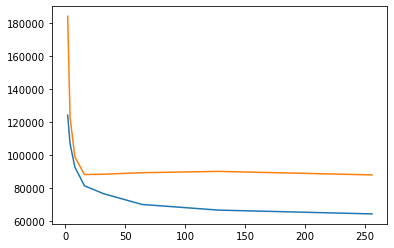

In [169]:
import matplotlib.pyplot as plt
plt.plot(*zip(*respuesta))
plt.plot(*zip(*respuesta_2))

plt.show()
    

 Para este estudo realizaronse 10 medidas por cada unha das combinacións para diminuir así o impacto da aletoriedade. No eixo vertical represéntase o custo mentres que no horizontal móstrase o tamaño da poboación. Además, decidiuse fixar a mutación en mutación individual(xa que se estima que é a que mellor resultados dará) e élite en 2 para realizar as probas.
 
 O remplazo elitista é representado pola liña en cor laranxa. Podemos apreciar como sigue unha tendencia a baixa para os tamaños de poboación pequenos. Pódese apreciar como para n=4 o valor do custo é prácticamente o igual que co remplazo por metades xa que,  neste caso, sería o mesmo calquera unha das implementacións (colleríanse os 2 mellores pais, que cadra coa metade da poboación). É de esperar que para tamaños maiores a 4 o custo que se atopa se estanque, xa que se estaría reemplazando a nova xeración de pais pola xerada no cruce da execución anterior de forma case total. No gráfico anterior podemos ver como isto é así de tal xeito que se estanca no custo de 100000.
 
 Por outra banda, representouse coa cor azul o remplazo por metades. Neste caso vemos como ao aumentar o tamaño o custo redúcese de forma paulatina (asintóticamente) e non se manten.Isto é debido a que, con este remplazo, o tamaño influe e non se queda fixado como ocorría no remplazo elitista. 
 
 En xeral, os mellores resultados obtivéronse co reemplazo por metades empregando un tempo de execución similar ao reemplazo elitista xa que tempo que tarda o algoritmo ven determinado polo tamaño da poblacion coa que se traballe nas xeracións. Por iso é importante chegar a un axuste entre boa solución e tempo, polo que se empregará o mecanismo do cóbado para fixar o tamaño da poboación coa que se farán os seguintes experimentos. Na gráfica vemos como este punto estaría en N=32 ou N=64. (neste caso traballarase coa poboación de 32)

### Pregunta 3 (1.5 puntos)



Ahora realiza un estudio similar variando la probabilidad de mutación en el rango 0, ..., 0.95 en pasos de 0.05~0.10. ¿Qué valor recomendarías para este parámetro? ¿Por qué? Ten en cuenta que tienes dos variantes del mecanismo de mutación.

In [170]:
probab_mutacion=[x/100 for x in range(0,100, 5)]
print(probab_mutacion)


[0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]


In [171]:
# g,tpoblacion, iteraciones, mutacion=mutacion_individual,reemplazo=reemplazo_mitad, probabilidad_mutacion=0.25 ):
print('EJECUCIONES DEPENDIENDO DE LA PROBABILIDAD DE MUTACIÓN')
probab_mutacion=[x/100 for x in range(0,100, 5)]
respuesta=[]
res=0.0

for t in trange(len(probab_mutacion),desc='Progreso de tamanhos'):
    for j in trange(50, desc='iteracion'):
        res+=(algoritmo_genetico_vc(g2,32, 500, mutacion=mutacion_cromosomica, probabilidad_mutacion=probab_mutacion[t]))[1]
    respuesta.append((probab_mutacion[t], res/50))
    res=0
print(respuesta)

respuesta_2=[]
res=0.0
for t in trange(len(probab_mutacion),desc='Progreso de tamanhos'):
    for j in trange(50, desc='iteracion'):
             res+=(algoritmo_genetico_vc(g2,32, 500, mutacion=mutacion_individual, probabilidad_mutacion=probab_mutacion[t]))[1]
    respuesta_2.append((probab_mutacion[t], res/50))
    res=0
print(respuesta_2)



EJECUCIONES DEPENDIENDO DE LA PROBABILIDAD DE MUTACIÓN


Progreso de tamanhos:   0%|          | 0/20 [00:00<?, ?it/s]

iteracion:   0%|          | 0/50 [00:00<?, ?it/s]

iteracion:   0%|          | 0/50 [00:00<?, ?it/s]

iteracion:   0%|          | 0/50 [00:00<?, ?it/s]

iteracion:   0%|          | 0/50 [00:00<?, ?it/s]

iteracion:   0%|          | 0/50 [00:00<?, ?it/s]

iteracion:   0%|          | 0/50 [00:00<?, ?it/s]

iteracion:   0%|          | 0/50 [00:00<?, ?it/s]

iteracion:   0%|          | 0/50 [00:00<?, ?it/s]

iteracion:   0%|          | 0/50 [00:00<?, ?it/s]

iteracion:   0%|          | 0/50 [00:00<?, ?it/s]

iteracion:   0%|          | 0/50 [00:00<?, ?it/s]

iteracion:   0%|          | 0/50 [00:00<?, ?it/s]

iteracion:   0%|          | 0/50 [00:00<?, ?it/s]

iteracion:   0%|          | 0/50 [00:00<?, ?it/s]

iteracion:   0%|          | 0/50 [00:00<?, ?it/s]

iteracion:   0%|          | 0/50 [00:00<?, ?it/s]

iteracion:   0%|          | 0/50 [00:00<?, ?it/s]

iteracion:   0%|          | 0/50 [00:00<?, ?it/s]

iteracion:   0%|          | 0/50 [00:00<?, ?it/s]

iteracion:   0%|          | 0/50 [00:00<?, ?it/s]

[(0.0, 169198.90008938397), (0.05, 103734.56132470623), (0.1, 121862.76544722513), (0.15, 131694.16683706263), (0.2, 137485.30652716462), (0.25, 142338.03544357844), (0.3, 145455.92068691275), (0.35, 147611.07280927643), (0.4, 148790.62600629881), (0.45, 150733.41925541914), (0.5, 151119.69619531522), (0.55, 151566.17828153417), (0.6, 151260.65384350307), (0.65, 153549.91359924283), (0.7, 153509.6009410886), (0.75, 153142.02792796463), (0.8, 153610.62627256586), (0.85, 153546.48987593307), (0.9, 154093.06702570847), (0.95, 154146.9875414899)]


Progreso de tamanhos:   0%|          | 0/20 [00:00<?, ?it/s]

iteracion:   0%|          | 0/50 [00:00<?, ?it/s]

iteracion:   0%|          | 0/50 [00:00<?, ?it/s]

iteracion:   0%|          | 0/50 [00:00<?, ?it/s]

iteracion:   0%|          | 0/50 [00:00<?, ?it/s]

iteracion:   0%|          | 0/50 [00:00<?, ?it/s]

iteracion:   0%|          | 0/50 [00:00<?, ?it/s]

iteracion:   0%|          | 0/50 [00:00<?, ?it/s]

iteracion:   0%|          | 0/50 [00:00<?, ?it/s]

iteracion:   0%|          | 0/50 [00:00<?, ?it/s]

iteracion:   0%|          | 0/50 [00:00<?, ?it/s]

iteracion:   0%|          | 0/50 [00:00<?, ?it/s]

iteracion:   0%|          | 0/50 [00:00<?, ?it/s]

iteracion:   0%|          | 0/50 [00:00<?, ?it/s]

iteracion:   0%|          | 0/50 [00:00<?, ?it/s]

iteracion:   0%|          | 0/50 [00:00<?, ?it/s]

iteracion:   0%|          | 0/50 [00:00<?, ?it/s]

iteracion:   0%|          | 0/50 [00:00<?, ?it/s]

iteracion:   0%|          | 0/50 [00:00<?, ?it/s]

iteracion:   0%|          | 0/50 [00:00<?, ?it/s]

iteracion:   0%|          | 0/50 [00:00<?, ?it/s]

[(0.0, 171122.91800135584), (0.05, 98911.17843803778), (0.1, 87850.97695902879), (0.15, 80892.57459648444), (0.2, 78482.52122235029), (0.25, 76031.44525333987), (0.3, 74002.83773300602), (0.35, 71877.28702283824), (0.4, 72251.09148331064), (0.45, 71076.51929031356), (0.5, 70270.56829572859), (0.55, 69993.29883442383), (0.6, 69309.86347145638), (0.65, 69764.51780977455), (0.7, 68474.5951450206), (0.75, 69204.20627052807), (0.8, 69184.90104673781), (0.85, 69775.32323229205), (0.9, 70673.908359854), (0.95, 70837.58433062298)]


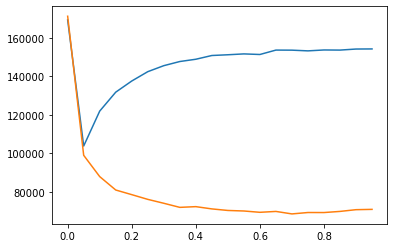

In [172]:
plt.plot(*zip(*respuesta))
plt.plot(*zip(*respuesta_2))
plt.show()
    

Para este laboratorio empregouse o mesmo método que na anterior investigación. Neste caso, no eixo das 'x' representase a probabilidade mentres que no da 'y' ségue sendo o custo.
Coa liña azul represéntase as probas realizadas coa metodoloxía de mutación cromosómica. Era de esperar que preesntase esa tendencia, para valores pequenos de probabilidade o custo baixa drasticamente pero ao pasar dun umbral sube. Isto pasa xa que, ao ser cromosómico valorarase cada un dos xenes que compoñen o cromosoma, e, para valores un pouco altos de probabilidade produciríase en case todos os cromosomas unha mutación polo que o resultado sería prácticamente aleatorio e non se mantería nada do cromosoma resultante tras o cruce. O mínimo custo obtido coa mutación cromosómica é coa probabilidade de 0.1 ou 0.15.

Por outra parte, atoparíamos a liña laraxa que representa a mutación individual. Este método fai que o custo baixe ata máis ou menos a probabilidade do 0.60, pero, para os porcentaxes superiores a este, o custo subirá.  O custo mellora xa que, ao aportar un cambio nas solucións, favorecerá que o algoritmo non caia en mínimos locais de tal xeito que é máis probable que nos dé mellores valores. En caso de que a probabilidade fose moi alta faría que o algoritmo fose demasiado "aleatorio" facendo que o custo se incremente de novo (que é o que vemos que pasa na gráfica anterior)
Por isto, obtaríase por escoeller unha probabilidade do 0.55 que é o punto no que vemos o menor valor.

Tras este análise, as probas para o último exercicio realizaranse con mutación individual con unha probabilidade do 0.55

### Pregunta 4 (2 puntos)

❓ Pregunta 4. Finalmente realiza un estudio variando el número de iteraciones máximas en el rango de 50 a 1000, considerando un paso variable o adaptativo a conveniencia. ¿Qué valor recomendarías para este parámetro? ¿Por qué? Realiza una discusión reflexionando sobre los resultados conjuntos de estos tres parámetros.

In [173]:
iteraciones=[x for x in range(50,1050,50)]
# g,tpoblacion, iteraciones, mutacion=mutacion_individual,reemplazo=reemplazo_mitad, probabilidad_mutacion=0.25 ):
print('EJECUCIONES DEPENDIENDO DEL NÚMERO DE ITERACIONES')

respuesta=[]
res=0.0

for t in trange(len(iteraciones),desc='Progreso de tamanhos'):
    for j in trange(10, desc='iteracion'):
        res+=(algoritmo_genetico_vc(g2,32, iteraciones[t],probabilidad_mutacion=0.55))[1]
    respuesta.append((iteraciones[t], res/10))
    res=0
print(respuesta)



EJECUCIONES DEPENDIENDO DEL NÚMERO DE ITERACIONES


Progreso de tamanhos:   0%|          | 0/20 [00:00<?, ?it/s]

iteracion:   0%|          | 0/10 [00:00<?, ?it/s]

iteracion:   0%|          | 0/10 [00:00<?, ?it/s]

iteracion:   0%|          | 0/10 [00:00<?, ?it/s]

iteracion:   0%|          | 0/10 [00:00<?, ?it/s]

iteracion:   0%|          | 0/10 [00:00<?, ?it/s]

iteracion:   0%|          | 0/10 [00:00<?, ?it/s]

iteracion:   0%|          | 0/10 [00:00<?, ?it/s]

iteracion:   0%|          | 0/10 [00:00<?, ?it/s]

iteracion:   0%|          | 0/10 [00:00<?, ?it/s]

iteracion:   0%|          | 0/10 [00:00<?, ?it/s]

iteracion:   0%|          | 0/10 [00:00<?, ?it/s]

iteracion:   0%|          | 0/10 [00:00<?, ?it/s]

iteracion:   0%|          | 0/10 [00:00<?, ?it/s]

iteracion:   0%|          | 0/10 [00:00<?, ?it/s]

iteracion:   0%|          | 0/10 [00:00<?, ?it/s]

iteracion:   0%|          | 0/10 [00:00<?, ?it/s]

iteracion:   0%|          | 0/10 [00:00<?, ?it/s]

iteracion:   0%|          | 0/10 [00:00<?, ?it/s]

iteracion:   0%|          | 0/10 [00:00<?, ?it/s]

iteracion:   0%|          | 0/10 [00:00<?, ?it/s]

[(50, 133179.17228149826), (100, 111407.77690702486), (150, 99832.05665913802), (200, 94233.86571728818), (250, 86308.00607839072), (300, 82197.09853949373), (350, 77564.73472080634), (400, 74385.09651494905), (450, 72626.75218825569), (500, 69576.4543244666), (550, 69270.06985450393), (600, 65144.81747955437), (650, 65168.91210263517), (700, 63210.91768109839), (750, 61524.9300922524), (800, 63811.67858973246), (850, 59762.15171062185), (900, 59321.869136468005), (950, 58050.107714699836), (1000, 56256.375883350105)]


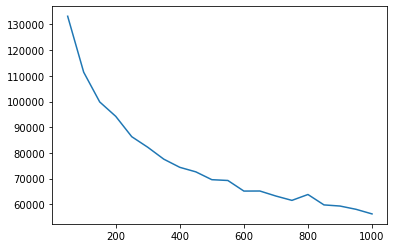

In [174]:
plt.plot(*zip(*respuesta))
plt.show()

Como podemos ver na gráfica anterior vemos un descenso do coste ao aumentar as iteracións. Como se realizou coa elección do tamaño da poboación, neste caso tamén seguiremos a regra do cóbado para chegar a un 'pacto' entre un custo e tempo. Neste caso vemos como un valor apropiado 800 iteracións xa que non supoñen un tempo excesivo de cómputo é da resultados similares a máis iteracións. 

Con todas as eleccións de descendemos a un custo entorno aos 59.000-60.000.
Nas seguinte celda probarase o outro tamaño de poboación que se barallou(64) además do elixido, para ver o valor mínimo do custo obtido en 100 execucións. Ademáis mostrarase cantas solucións son aceptadas cunha desviación do 25% con respecto ao mínimo atopado.

In [175]:
import numpy as np
res=[]
for j in trange(100, desc='iteracion'):
    res.append(algoritmo_genetico_vc(g2,32,800,probabilidad_mutacion=0.55)[1])

contador=0
minimo=np.amin(res)
print('O mínimo obt é: ', minimo)
for i in res:
    if minimo +  0.25*minimo >= i:
        contador+=1
print((contador/len(res))*100)

iteracion:   0%|          | 0/100 [00:00<?, ?it/s]

O mínimo obt é:  51450.51801674475
76.0


In [176]:
res=[]
for j in trange(100, desc='iteracion'):
    res.append(algoritmo_genetico_vc(g2,64,800,probabilidad_mutacion=0.55)[1])
contador=0
minimo=np.amin(res)
print('O mínimo obtido é: ', minimo)
for i in res:
    if minimo +  0.25*minimo >= i:
        contador+=1
print((contador/len(res))*100)

iteracion:   0%|          | 0/100 [00:00<?, ?it/s]

O mínimo obtido é:  47005.47098849118
65.0


Podemos ver que, con N=32 obtemos uncusto 5000 puntos superior ao de 64 pero supón un incremento no tempo de execución( o dobre, con N=32 as 100 execucións tardan arredor de 40 segundos, mentres que con 64 tarda 1min e 30 segundos). Por outra banda, vemos que, coa primera execución todos os resultados se atopan máis cercanos ao mínimo que con N=64 o que nos dá unha confianza maior.

Tras analizar estos resultados podemos ver como este algoritmo nos dá solucións peores que outras estudadas con anterioridade como a búsqueda tabú que, para o mesmo problema, daba solucións sobre os 20000 en custo.